**Project : Credit card Fraud Detection**

**Import neccessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import log_loss,classification_report,accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
#sampling
from imblearn .under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Data loading** 

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount,

[3]
0s


In [2]:
df=pd.read_csv(r'//content/drive/MyDrive/Assigment machine learning/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# cheking missing values in data set
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

such as no missing values in my data set


In [7]:
# distrubution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

this is highly unbalance data set first we have create balance data set using undersampling 
 
 
 
0--> **Normal Transaction**
1-->**fraudulent Transaction**

In [8]:
# seperating the data for analysis
legit=df[df['Class']==0]
fraud=df[df['Class']==1]

In [9]:
## we need to analyze more amount of information from the transaction data
# how different are the amount of money is use in different transaction classes? 
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# compair the values of both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**visualisation**

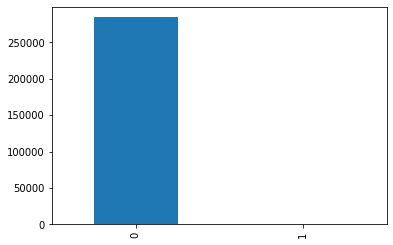

In [12]:
df['Class'].value_counts().plot(kind='bar')

here we see that with help of graph the our data how much unbalance

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


**for visualisation we create balance data set**

In [14]:
legit=df.loc[df['Class']==0].sample(n=492)
fraud=df.loc[df['Class']==1]

dff=pd.concat([legit,fraud])
# here we concat  first to here we make tha data balance then after merge it
#the purpose is only visualise and the how the data are distrubute to take small random sample

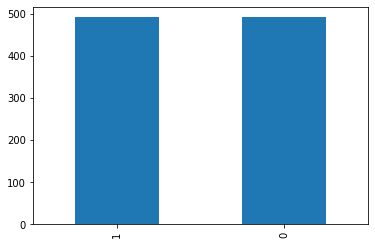

In [15]:
dff['Class'].value_counts().plot(kind='bar')

In [16]:
dff['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

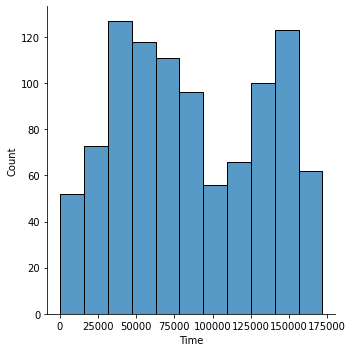

In [17]:
sns.displot(dff['Time'])

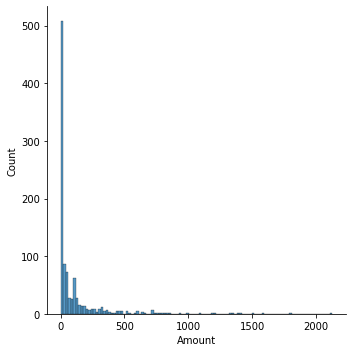

In [18]:
sns.displot(dff['Amount'])

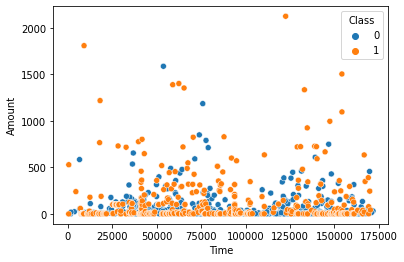

In [19]:
sns.scatterplot(x='Time',y='Amount',hue='Class',data=dff)

here we see that how the data are complax

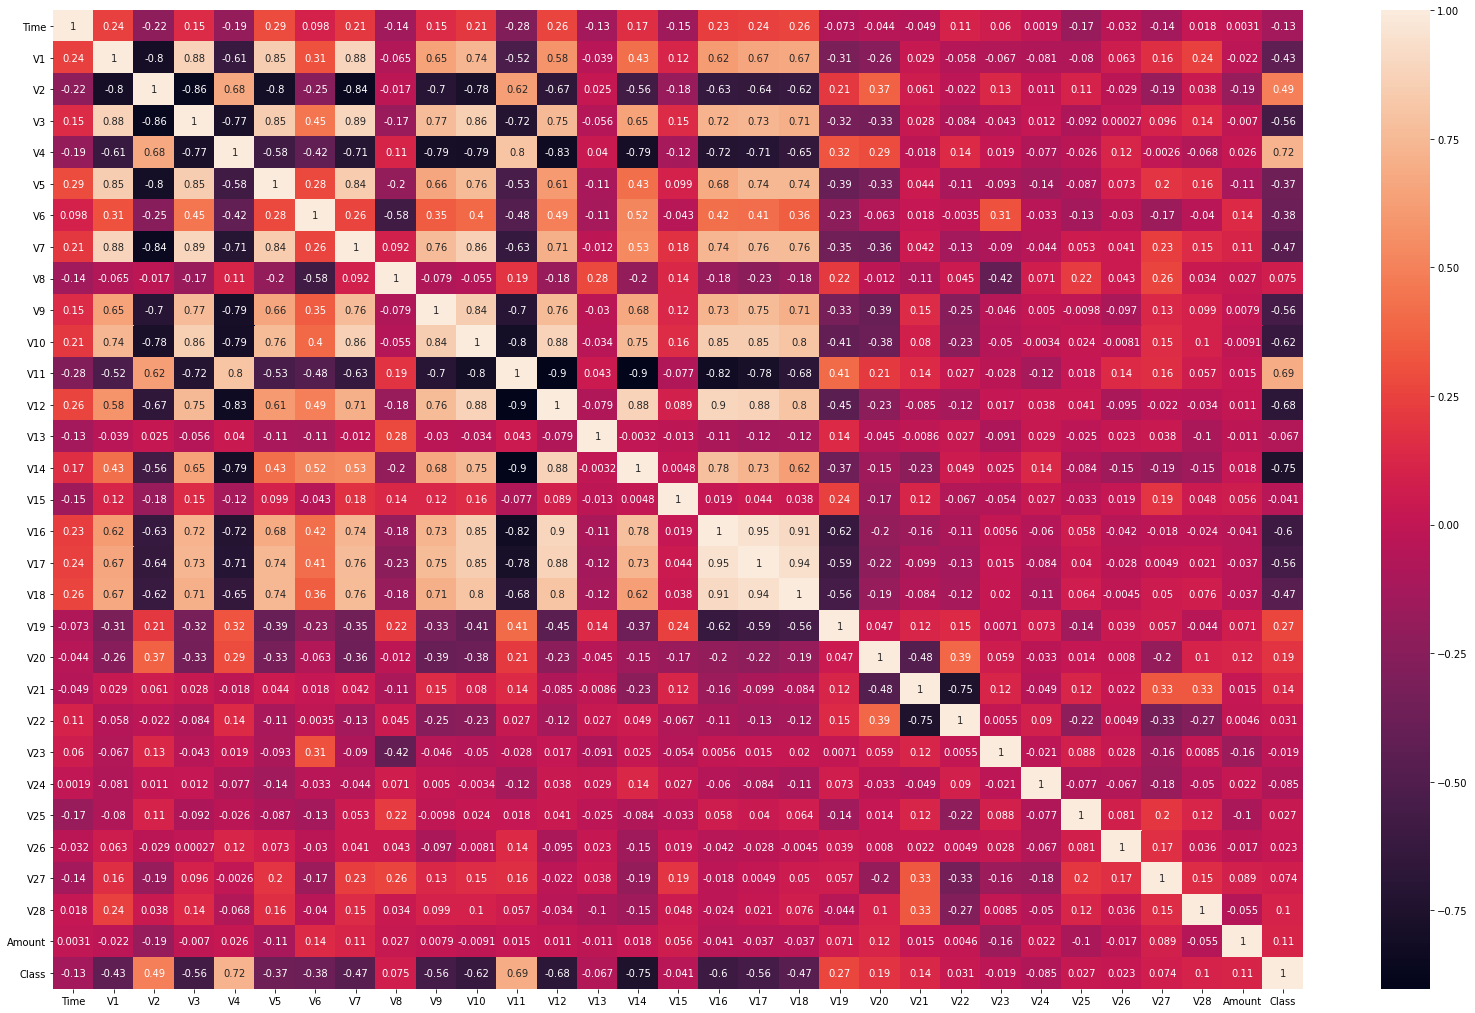

In [20]:
plt.figure(figsize=(28,18))
sns.heatmap(dff.corr(),annot=True)

In [21]:
dff.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.241219,-0.219170,0.148169,-0.192997,0.288905,0.098194,0.210500,-0.143373,0.146975,0.209055,-0.278741,0.259076,-0.129904,0.165742,-0.145470,0.227166,0.236759,0.259440,-0.072795,-0.043776,-0.048852,0.106212,0.060288,0.001870,-0.174947,-0.032206,-0.136566,0.017561,0.003126,-0.125688
V1,0.241219,1.000000,-0.796809,0.877173,-0.612935,0.850110,0.313008,0.884465,-0.065288,0.647764,0.738009,-0.524277,0.576997,-0.038775,0.427531,0.116623,0.620526,0.665469,0.674247,-0.306435,-0.255637,0.028760,-0.057573,-0.066535,-0.080889,-0.079658,0.063053,0.163364,0.236182,-0.022192,-0.428004
V2,-0.219170,-0.796809,1.000000,-0.858196,0.675823,-0.803505,-0.249420,-0.843640,-0.017155,-0.699873,-0.775944,0.622629,-0.665086,0.024670,-0.564680,-0.180356,-0.628683,-0.641229,-0.619918,0.211599,0.369305,0.061224,-0.021778,0.131956,0.010675,0.106220,-0.028836,-0.187534,0.038244,-0.188707,0.489059
V3,0.148169,0.877173,-0.858196,1.000000,-0.772295,0.851172,0.451411,0.890612,-0.169458,0.768371,0.856004,-0.717658,0.750712,-0.056225,0.649516,0.149524,0.723562,0.734184,0.705016,-0.324037,-0.332605,0.028245,-0.084221,-0.042832,0.012205,-0.091705,0.000268,0.096301,0.137928,-0.007023,-0.564473
V4,-0.192997,-0.612935,0.675823,-0.772295,1.000000,-0.576987,-0.423258,-0.707930,0.108744,-0.789277,-0.794714,0.800357,-0.828956,0.040365,-0.794964,-0.119873,-0.720081,-0.710319,-0.648173,0.318029,0.287478,-0.017911,0.143300,0.019059,-0.077161,-0.025832,0.121183,-0.002566,-0.067969,0.026027,0.717856
V5,0.288905,0.850110,-0.803505,0.851172,-0.576987,1.000000,0.276488,0.841468,-0.203774,0.664322,0.755059,-0.532791,0.610796,-0.110714,0.427591,0.098719,0.684345,0.740089,0.744603,-0.393562,-0.328193,0.044225,-0.107664,-0.092924,-0.138863,-0.087147,0.072683,0.196481,0.161799,-0.109902,-0.371667
V6,0.098194,0.313008,-0.249420,0.451411,-0.423258,0.276488,1.000000,0.263206,-0.581228,0.350859,0.401915,-0.479817,0.488529,-0.114982,0.522247,-0.042529,0.420416,0.413091,0.357431,-0.231061,-0.063260,0.017622,-0.003469,0.310824,-0.033302,-0.132007,-0.030100,-0.166298,-0.039596,0.142917,-0.380989
V7,0.210500,0.884465,-0.843640,0.890612,-0.707930,0.841468,0.263206,1.000000,0.091513,0.763674,0.863513,-0.633370,0.708755,-0.011950,0.532023,0.177345,0.738094,0.763288,0.760591,-0.353967,-0.362879,0.041511,-0.134831,-0.089632,-0.044075,0.052873,0.041463,0.228549,0.149762,0.109690,-0.466880
V8,-0.143373,-0.065288,-0.017155,-0.169458,0.108744,-0.203774,-0.581228,0.091513,1.000000,-0.079440,-0.054815,0.186718,-0.179944,0.278954,-0.202174,0.137814,-0.183264,-0.229426,-0.184394,0.218334,-0.012027,-0.106595,0.044749,-0.415768,0.071294,0.223706,0.043458,0.257266,0.033965,0.026700,0.074790
V9,0.146975,0.647764,-0.699873,0.768371,-0.789277,0.664322,0.350859,0.763674,-0.079440,1.000000,0.844184,-0.700415,0.757155,-0.029615,0.676983,0.124999,0.728719,0.754979,0.709152,-0.328257,-0.391871,0.151141,-0.254447,-0.045889,0.004977,-0.009834,-0.096700,0.134399,0.098753,0.007851,-0.558699


**Further operation done by the original and unbalance data set**

now divide the feature x and y coumn from original data df


In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [24]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

**here we don't  need of Time column so we drop it**

In [25]:
x.drop('Time',axis=1,inplace=True)

we split the data into train ,test,split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=11)


**now we need to balance the data set we use under sampling for balance the data set**

In [27]:
from imblearn.under_sampling import RandomUnderSampler as ros

In [28]:
ro=ros(random_state=1)
x_train,y_train=ro.fit_sample(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
pd.Series(y_train).value_counts()

1    333
0    333
dtype: int64

**here we create the dataset balance**

In [30]:
sc=StandardScaler()
x_train1=sc.fit_transform(x_train)
x_test1=sc.transform(xtest)
x_train1

array([[ 0.78314075, -0.58188039,  0.60643032, ..., -0.01200017,
        -0.12355189, -0.37996261],
       [ 0.22468996, -0.22788062,  0.23828983, ..., -0.04394557,
        -0.11456823, -0.409575  ],
       [ 0.20740017,  0.05372992,  0.79173929, ..., -0.37086477,
        -0.14061327, -0.44340657],
       ...,
       [-0.09583787, -0.50682278,  0.67364739, ...,  1.14348433,
        -0.11265273, -0.43938272],
       [ 0.07340171,  0.41859699, -0.06086474, ...,  1.23037179,
         1.31079374, -0.41664603],
       [-1.52493668,  1.21329609, -1.71731351, ..., -0.02547565,
        -1.18768358, -0.26866222]])

**now we need to scaling because our 28 feature already aplied pca on it but our Amount column has not scale we scele it**

In [58]:
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=29))
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [60]:
trained_model=model.fit(x_train1,y_train,epochs=24,batch_size=16)

Epoch 1/24
42/42 [==============================] - 1s 2ms/step - loss: 0.5090
Epoch 2/24
42/42 [==============================] - 0s 2ms/step - loss: 0.3410
Epoch 3/24
42/42 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 4/24
42/42 [==============================] - 0s 2ms/step - loss: 0.2443
Epoch 5/24
42/42 [==============================] - 0s 2ms/step - loss: 0.2157
Epoch 6/24
42/42 [==============================] - 0s 2ms/step - loss: 0.1939
Epoch 7/24
42/42 [==============================] - 0s 2ms/step - loss: 0.1760
Epoch 8/24
42/42 [==============================] - 0s 2ms/step - loss: 0.1616
Epoch 9/24
42/42 [==============================] - 0s 2ms/step - loss: 0.1519
Epoch 10/24
42/42 [==============================] - 0s 2ms/step - loss: 0.1418
Epoch 11/24
42/42 [==============================] - 0s 2ms/step - loss: 0.1346
Epoch 12/24
42/42 [==============================] - 0s 2ms/step - loss: 0.1305
Epoch 13/24
42/42 [==============================

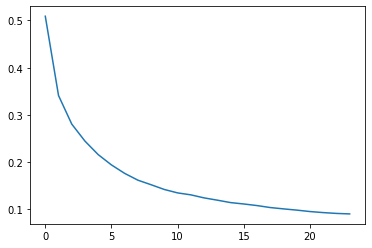

In [61]:
plt.plot(trained_model.history['loss'])

In [62]:
ypred=model.predict(x_test1)

In [63]:
ypred=np.where(ypred>=0.5,1,0)

In [64]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85284
           1       0.04      0.87      0.07       159

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [65]:
accuracy_score(ytest,ypred)

0.9566494622145758

In [66]:
confusion_matrix(ytest,ypred)

array([[81600,  3684],
       [   20,   139]])